# Beginning of the Covid-19 Case Study:

### The Case study is categorized in sections in accordance with the categories of the questions / problem statements.

### Note that the path specified here is with respect to my system. Please replace the values for path parameter with the following ones, as the datasets are in the same folder on GitHub as this file:

 * covid_confirmed = pd.read_csv("covid_19_confirmed.csv")
 * covid_deaths = pd.read_csv("covid_19_deaths.csv")
 * covid_recovered = pd.read_csv("covid_19_recovered.csv")

### Please run all the cells at once and then review each section one by one, this will make sure that all the variables and functions are initialized step by step.


# 1. Data Loading

In [1]:
j# Importing all the required libraries and datasets:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# covid_confirmed = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Covid-19 Case Study/covid_19_confirmed.csv")
# covid_deaths = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Covid-19 Case Study/covid_19_deaths.csv")
# covid_recovered = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Covid-19 Case Study/covid_19_recovered.csv")
covid_confirmed = pd.read_csv("covid_19_confirmed.csv")
covid_deaths = pd.read_csv("covid_19_deaths.csv")
covid_recovered = pd.read_csv("covid_19_recovered.csv")

# 2. Data Exploration:

## 2.1 Analyzing the structure of each dataset:

In [2]:
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [3]:
covid_deaths.head()
# Since we have an irrelevant extra row as the header we need to change the header:
# Note: This is for demonstrative purposes. We can also use `skiprows=1` while importing dataset
header = covid_deaths.iloc[0]
covid_deaths = covid_deaths[1:]
covid_deaths.columns = header
covid_deaths.reset_index(drop=True, inplace=True)
covid_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [4]:
covid_recovered.head()
# Since we have an irrelevant extra row as the header we need to change the header:
# Note: This is for demonstrative purposes. We can also use `skiprows=1` while importing dataset
header = covid_recovered.iloc[0]
covid_recovered = covid_recovered[1:]
covid_recovered.columns = header
covid_recovered.reset_index(drop=True, inplace=True)
covid_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896
257,NaN,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,295643,296901,297201,297201,298502,299024,299559,299559,300125,300524
258,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3159,3179,3201,3245,3260,3273,3306,3339,3375,3399
259,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,90955,91019,91102,91156,91200,91221,91239,91321,91443,91594


### Observations from the datasets:--------------------------------------

 1. The data includes rows containing the geographical entries along with the cumulative number of confirmed cases

 2. Only a few rows have values assigned for "Province/State" column, most rows have NaN as their values

 3. "Country/Region" - `str` type data, "Lat" and "Long" columns contain latitudes and longitudes for the respective geographical entries - `float` data type

 4. The structure of the datasets for "death cases" and "recovered cases" is similar to that of the dataset for the confirmed cases.

 5. However, the key difference is an irrelevant extra row as the header in both the datasets.

 6. Hence, we changed the header to the first row, which contains the accurate labels for the columns.

## 2.2 Generating Plots of Confirmed Cases Over Time for the Top Countries

### (Top 7 Countries by Number of Cases):

#### The intuition for taking Top 7 countries is that it includes most of the influential and economically sound countries in the world such as: India, Russia, U.S., France, and U.K. And since it is based on the most number of cases, it gives a clear picture of the situation during the pandemic.

In [6]:
# Converting all the date strings into datetime object:
all_dates = covid_confirmed.columns[4:]
dates_dt = pd.to_datetime(all_dates, format="%m/%d/%y")

# Accessing the month end dates for every month in the dataset by grouping based on years and months:
date_series = pd.Series(dates_dt)
month_end = date_series.groupby([dates_dt.year, dates_dt.month]).max()

In [7]:
# Mapping the datetime objects with the date stings in form of a dictionary:
mapped_dates = dict(zip(dates_dt, all_dates))

# Obtaining list of month end dates using list comprehension on the mapped_dates dictionary:
month_end_cols = [mapped_dates[e] for e in month_end]

In [8]:
# Creating a new DataFrame by Grouping the confirmed cases dataset by "Country/Region" Column and accessing all the date columns
# Note: -> Using `sum()` makes sure that all the provinces are added up and we get the correct number of cases for the entire country

cases_per_country = covid_confirmed.groupby("Country/Region")[all_dates].sum()
latest_col = all_dates[-1] # Accessing the last date in the data set


# Obtaining the list of top 7 countries by number of cases:
# |-> Sorting the DataFrame by most number of cases
# |-> Accessing the top 7 rows
# |-> Accessing the index values, i.e., the name of the Top 7 Countries by number of cases
top_7_countries = list(cases_per_country[latest_col].sort_values(ascending=False).head(7).index)


# Creating a DataFrame containing the number of cases on the end of every month for the Top 7 Countries:
month_end_cases_top_7_countries = cases_per_country.loc[top_7_countries, month_end_cols]

In [9]:
# Finding the range for the maximum number of cases an individual country have:
max_cases = month_end_cases_top_7_countries[latest_col].values[0]

# Function Definition - Round off the maximum number of cases to get a range:
def round_off(number):
  return int(math.ceil(number / 10000000) * 10000000)
# Function Calling:
max_cases_range = round_off(max_cases)

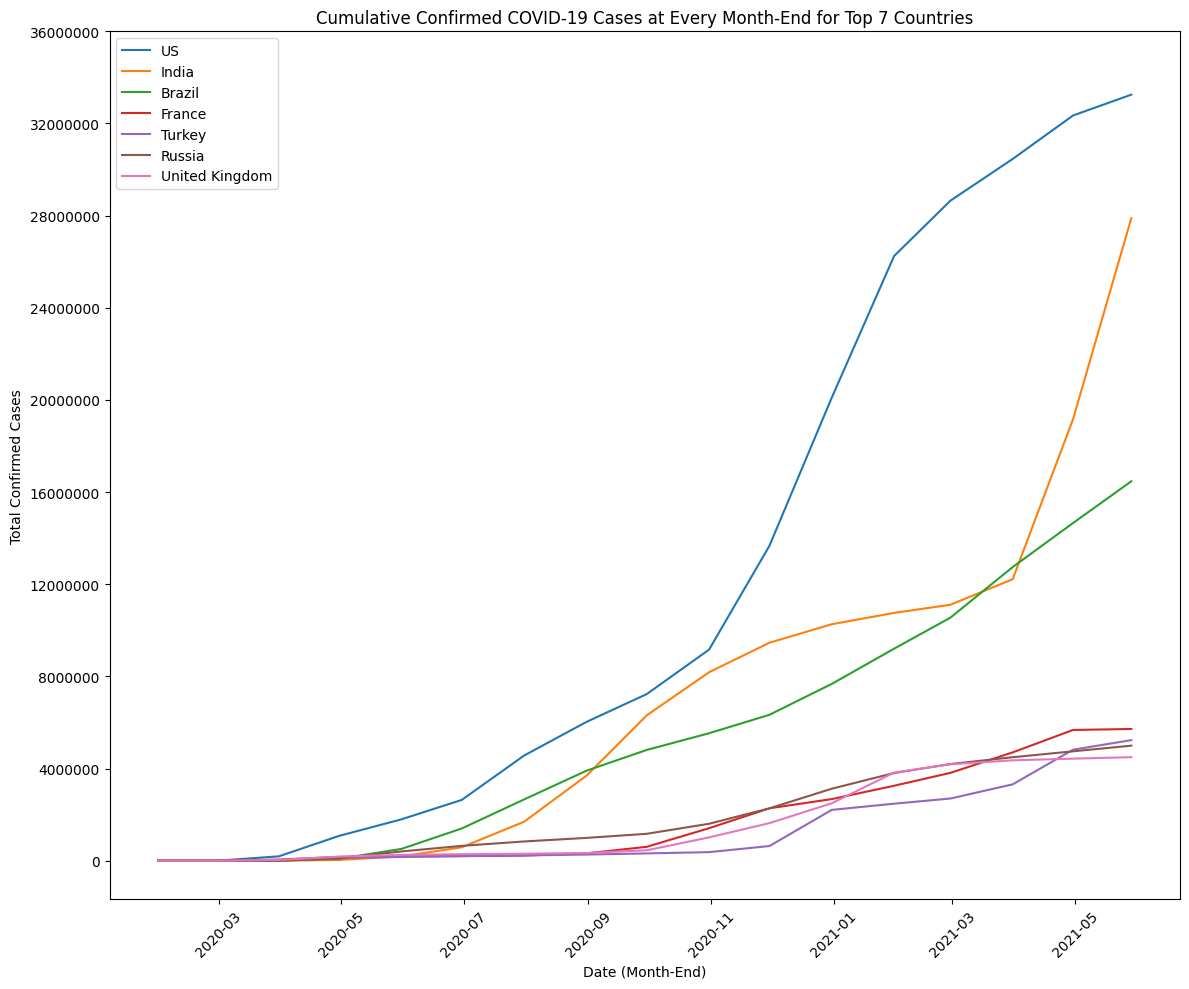

In [10]:
# Specifying the values for the x-axis:
x = pd.to_datetime(month_end_cols, format="%m/%d/%y")

# Specifying size of the figure:
plt.figure(figsize=(12, 10))

# Plotting the values on a line plot:
for country in top_7_countries:
  y = month_end_cases_top_7_countries.loc[country, month_end_cols]
  plt.plot(x, y, label=country)

# Defining various attributes of the plot:
plt.title("Cumulative Confirmed COVID-19 Cases at Every Month-End for Top 7 Countries")
plt.yticks(np.arange(0, max_cases_range, 4000000))
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False) # To display the values specified for `yticks` as it is instead of in a decimal form
plt.xlabel("Date (Month-End)")
plt.ylabel("Total Confirmed Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The above plot depicts the rise in confirmed Covid-19 cases over time for the Top 7 Countries based on the total number of cases

### And below are detailed plots for each of the 7 countries individually:

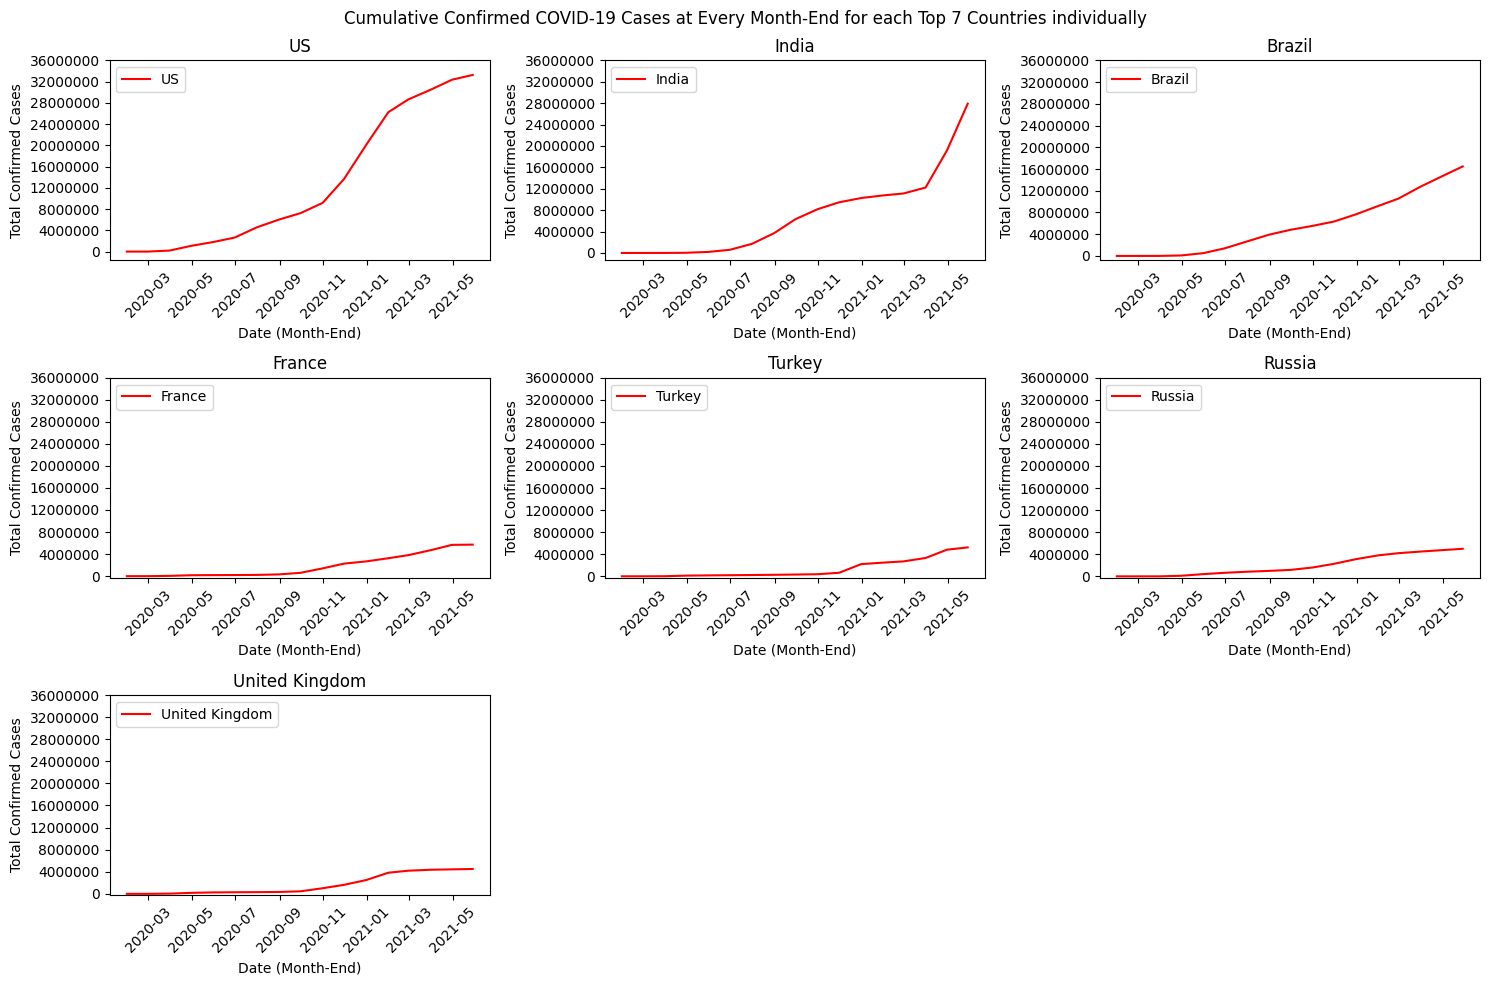

In [11]:
# Plotting the values on a line plots for each country individually:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten() # The 2D axes array is transformed in a 1D numpy array
for idx, country in enumerate(top_7_countries):
  ax = axs[idx]
  x = pd.to_datetime(month_end_cols, format="%m/%d/%y")
  y = month_end_cases_top_7_countries.loc[country, month_end_cols]
  # Defining various attributes of the plot:
  ax.plot(x, y, label=country, color="red")
  ax.set_title(f"{country}")
  ax.set_ylabel("Total Confirmed Cases")
  ax.set_xlabel("Date (Month-End)")
  ax.set_yticks(np.arange(0, max_cases_range, 4000000))
  ax.ticklabel_format(style='plain', axis='y', useOffset=False) # To display the values specified for `yticks` as it is instead of in a decimal form
  ax.legend(loc="upper left")
  ax.tick_params(axis="x", rotation=45)

# Hiding any unused subplots:
for j in range(len(top_7_countries), 9):
  fig.delaxes(axs[j])

plt.suptitle("Cumulative Confirmed COVID-19 Cases at Every Month-End for each Top 7 Countries individually")
plt.tight_layout()
plt.show()

## 2.3 Generating Plots of confirmed cases over time for China:

### Upon analyzing the data for confirmed cases in china, we can clearly see that the number of cases are not accurate, since china is the country where the Covid-19 SARS virus originated. **The actual number of cases have not been disclosed by their government as per the reports of multiple media networks**

#### The top 5 provinces with highest number of reported confirmed cases are:
##### 1. Hubei (The province where Wuhan - the origin city of the virus is located)
##### 2. Hong Kong
##### 3. Guangdong
##### 4. Shanghai (The financial capital of china)
##### 5. Heilongjiang

### Other than these 5 provinces, all of the provinces of China have number of confirmed cases less than 1500.

### Hence, we will only take into account these 5 provinces to get a better idea of the Covid-19 outbreak in china.

In [12]:
# Obtaining the list of top 5 chinese provinces having highest number of reported cases:
cases_per_country_and_province = covid_confirmed.groupby("Country/Region")
china_cases_per_province = cases_per_country_and_province.get_group("China").reset_index(drop=True).set_index("Province/State")
china_cases_top_5_provinces = china_cases_per_province.sort_values(latest_col, ascending=False).head().index

In [13]:
# Creating a new DataFrame for these 5 provinces containing the data for cumulative cases on each month end date:
month_end_cases_top_5_chinese_provinces = china_cases_per_province.loc[china_cases_top_5_provinces, month_end_cols]

In [14]:
# Obtaining the data for cumulative cases on each month end date for entire china:
total_cases_china = cases_per_country_and_province[all_dates].sum().loc["China"]
total_cases_china_month_end = total_cases_china.loc[month_end_cols]

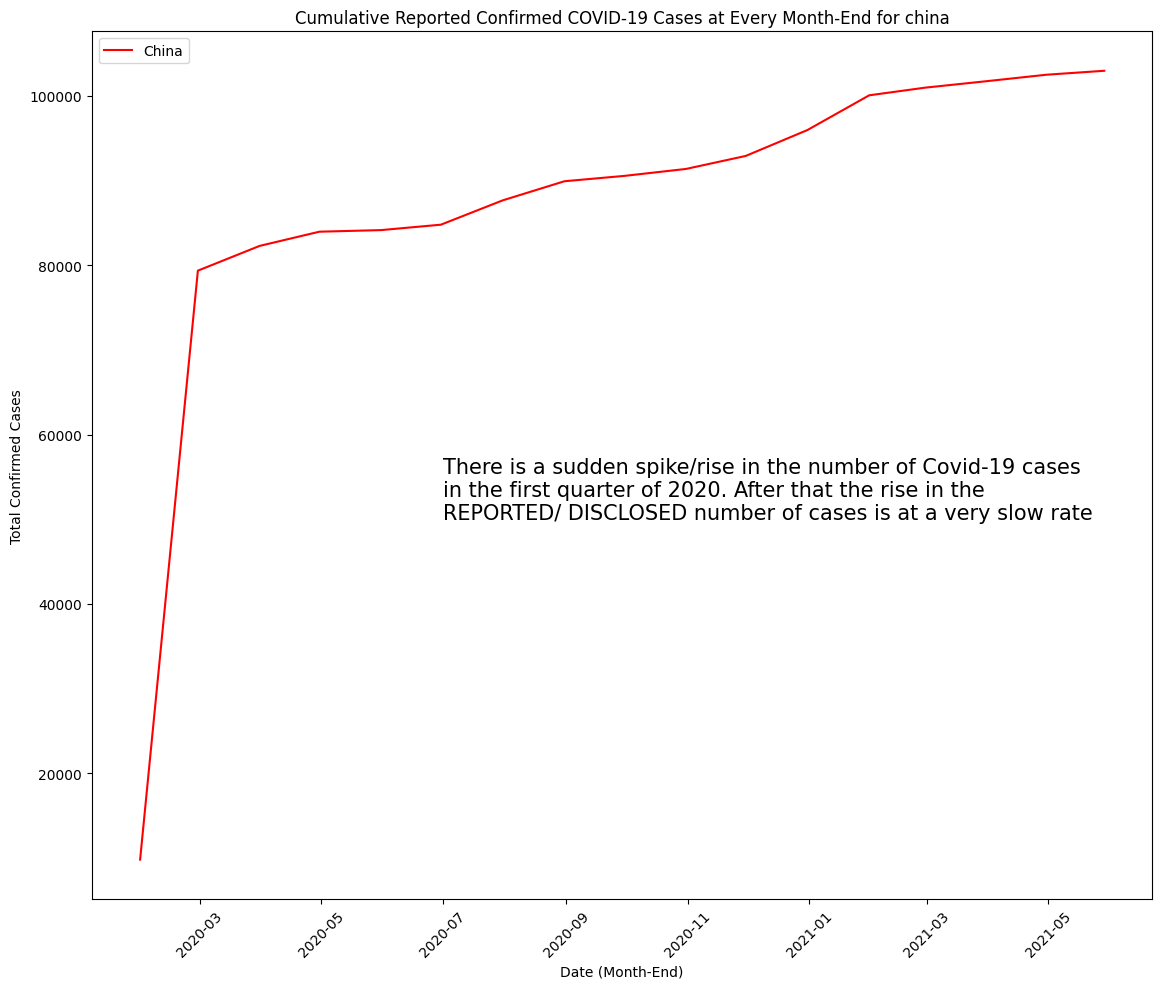

In [15]:
# Plotting a line plot for the reported cases in entire china:

# Specifying the values for the x-axis:
x = pd.to_datetime(month_end_cols, format="%m/%d/%y")

# Specifying size of the figure:
plt.figure(figsize=(12, 10))

# Plotting the values on a line plot:
y = total_cases_china_month_end.loc[month_end_cols]
plt.plot(x, y, label="China", color="red")

# Defining various attributes of the plot:
plt.title("Cumulative Reported Confirmed COVID-19 Cases at Every Month-End for china")
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False) # To display the values specified for `yticks` as it is instead of in a decimal form
plt.xlabel("Date (Month-End)")
plt.ylabel("Total Confirmed Cases")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.text(pd.to_datetime("2020-07", format="%Y-%m"), 50000, "There is a sudden spike/rise in the number of Covid-19 cases\nin the first quarter of 2020. After that the rise in the\nREPORTED/ DISCLOSED number of cases is at a very slow rate", fontsize=15)
plt.tight_layout()
plt.show()

### The above plot depicts the rise in reported Covid-19 cases over time for entire china

### And below are detailed plots for each of the top 5 provinces of china having highest number of cases:

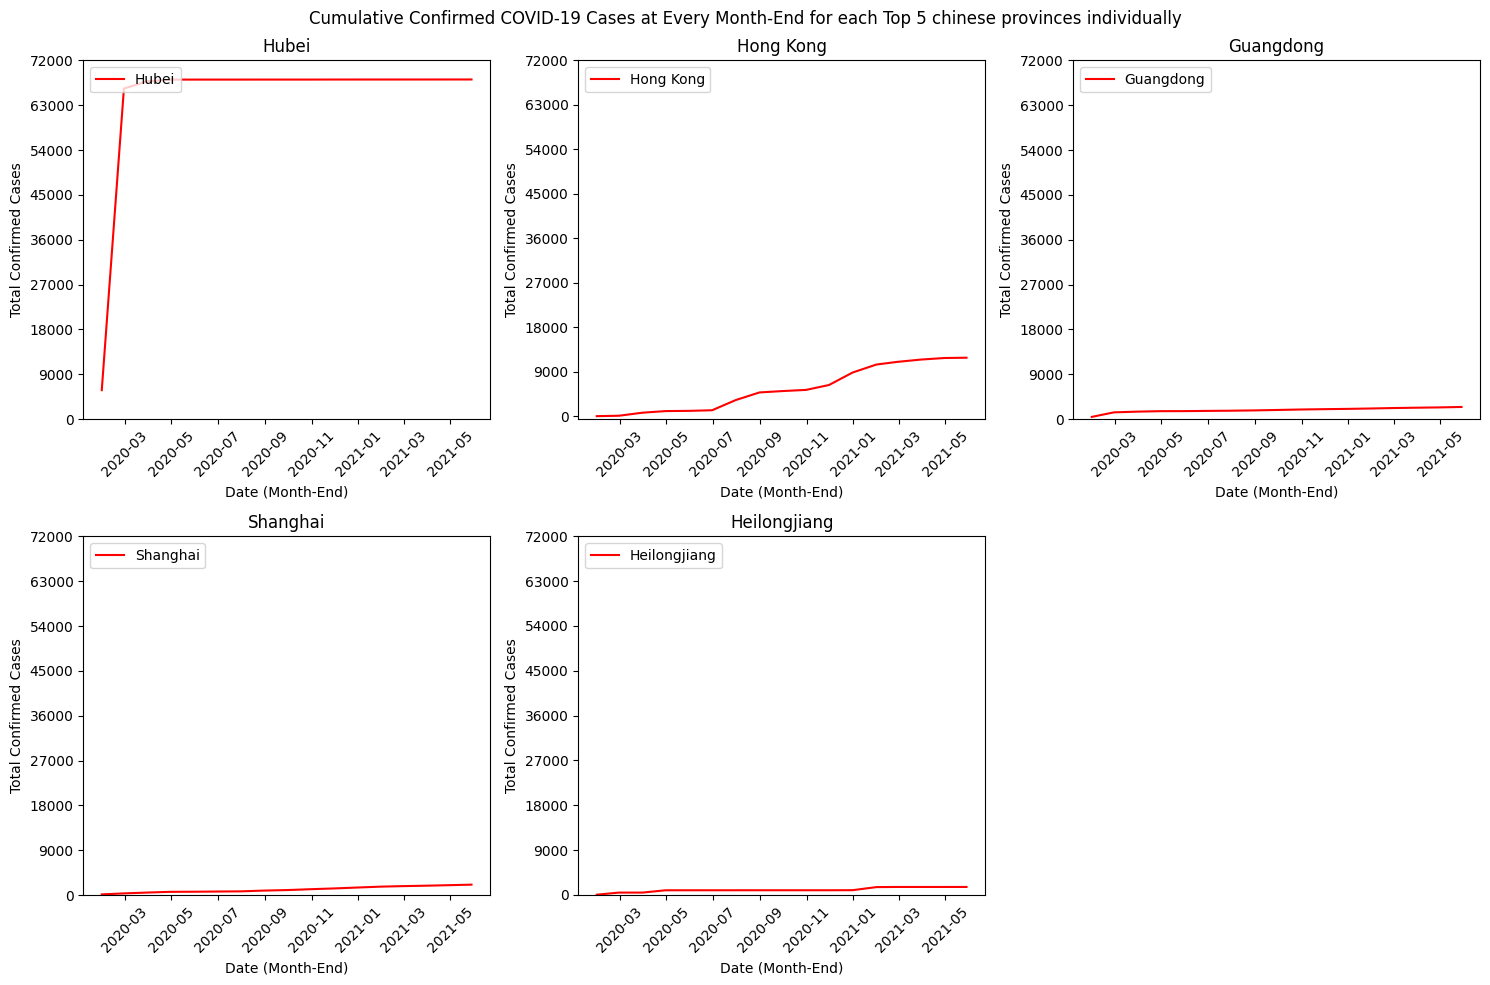

In [16]:
# Plotting the values on a line plots for each chinese province individually:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten() # The 2D axes array is transformed in a 1D numpy array
for idx, province in enumerate(china_cases_top_5_provinces):
  ax = axs[idx]
  x = pd.to_datetime(month_end_cols, format="%m/%d/%y")
  y = month_end_cases_top_5_chinese_provinces.loc[province, month_end_cols]
  # Defining various attributes of the plot:
  ax.plot(x, y, label=province, color="red")
  ax.set_title(f"{province}")
  ax.set_ylabel("Total Confirmed Cases")
  ax.set_xlabel("Date (Month-End)")
  ax.set_yticks(np.arange(0, 81000, 9000))
  ax.ticklabel_format(style='plain', axis='y', useOffset=False) # To display the values specified for `yticks` as it is instead of in a decimal form
  ax.legend(loc="upper left")
  ax.tick_params(axis="x", rotation=45)

# Hiding any unused subplots:
for j in range(len(china_cases_top_5_provinces), 6):
  fig.delaxes(axs[j])

plt.suptitle("Cumulative Confirmed COVID-19 Cases at Every Month-End for each Top 5 chinese provinces individually")
plt.tight_layout()
plt.show()

# 3. Handling Missing Data:

## First we identify the columns that contain null (NaN) values:

In [17]:
columns_with_nan_conf = covid_confirmed.isna().any()
print(columns_with_nan_conf[columns_with_nan_conf == True].index)

columns_with_nan_deaths = covid_deaths.isna().any()
print(columns_with_nan_deaths[columns_with_nan_deaths == True].index)

columns_with_nan_recov = covid_recovered.isna().any()
print(columns_with_nan_recov[columns_with_nan_recov == True].index)

Index(['Province/State', 'Lat', 'Long'], dtype='object')
Index(['Province/State', 'Lat', 'Long', '4/20/20'], dtype='object', name=0)
Index(['Province/State', 'Lat', 'Long', '4/20/20'], dtype='object', name=0)


## Based on the observation of the above output, we have the following columns with NaN values in each dataset:-

### -> covid_confirmed : "Province/State", "Lat", and "Long"
### -> covid_deaths : "Province/State", "Lat", "Long", and "4/20/20"
### -> covid_recovered : "Province/State", "Lat", "Long", and "4/20/20"

## Note: As the task for replacing the NaN values in "Province/State" column with "All Provinces" is given in the **Question 4**, we will work on it later

## 3.1 We will first handle the missing values in the covid_confirmed dataset

In [18]:
# Here, we are looking for all the rows that has "NaN" values in either of the "Lat" or "Long" column:
nan_lat_long = covid_confirmed[covid_confirmed["Lat"].isna() | covid_confirmed["Long"].isna()]
print(nan_lat_long) # Let's observe the data we extracted


# We can see here that the data of the first row is for a province in canada, and it has a 13 cumulative number of cases.
update_index1 = nan_lat_long.index[0] # Storing the index


# The data of the second row is a province in china, but the cumulative number of cases is 0.
update_index2 = nan_lat_long.index[1] # Storing the index

            Province/State Country/Region  Lat  Long  1/22/20  1/23/20  \
52  Repatriated Travellers         Canada  NaN   NaN        0        0   
88                 Unknown          China  NaN   NaN        0        0   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  5/20/21  5/21/21  5/22/21  \
52        0        0        0        0  ...       13       13       13   
88        0        0        0        0  ...        0        0        0   

    5/23/21  5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  
52       13       13       13       13       13       13       13  
88        0        0        0        0        0        0        0  

[2 rows x 498 columns]


In [19]:
# We can further observe the same row by using `.loc[]` method in the below DataFrame `cases_per_country_and_province` as well, where the DataFrame is grouped by "Country/Region"
cases_per_country_and_province.get_group("Canada").loc[update_index1]

,52
Province/State,Repatriated Travellers
Country/Region,Canada
Lat,NaN
Long,NaN
1/22/20,0
...,...
5/25/21,13
5/26/21,13
5/27/21,13
5/28/21,13


In [20]:
# We can further observe the same row by using `.loc[]` method in the below DataFrame `cases_per_country_and_province` as well, where the DataFrame is grouped by "Country/Region"
cases_per_country_and_province.get_group("China").loc[update_index2]

,88
Province/State,Unknown
Country/Region,China
Lat,NaN
Long,NaN
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0
5/28/21,0


### Upon observing and analyzing the both the outputs above, we obtain two rows where we have NaN values for the "Lat" and "Long" columns.
### The first row has a cumulative total of 13 cases, and the second row has 0.

### Let's operate on these rows one by one:
#### First Row:


*   The data on the first row is for a canadian province, and we have data available for other canadian province as well.
*   Therefore, we will calculate median of the available latitude and longitude values of other canadian provinces.
*   The reason for calculating median is that there are certain outliers in the "Lat" and "Long" which if we calculated and considered mean, will **skew** the data.
*   Therefore, we calculate median, and replace the NaN values with it.

#### Second Row:


*   The data on the second row is of an unknown chinese province.
*   We will calculate mean of the available latitude and longitude values of other chinese provinces.
*   The reason for calculating mean is that there are no visible outliers in the "Lat" and "Long" columns for the rows of chinese provinces
*   Therefore, we calculate mean, and replace the NaN values with it to get an accurate picture.



In [21]:
# First Row:-------------------------------------------------------------------------------------------
# Calculating the median for the Latitudes and Logitudes for each country:
median_lat = covid_confirmed.groupby("Country/Region")["Lat"].median()
median_long = covid_confirmed.groupby("Country/Region")["Long"].median()

# Accessing the median latitude and longitude values for canada and replacing the NaN values with them:
covid_confirmed.loc[update_index1, "Lat"] = median_lat.loc["Canada"]
covid_confirmed.loc[update_index1, "Long"] = median_long.loc["Canada"]

# Second Row:------------------------------------------------------------------------------------------
# Calculating the mean for the Latitudes and Logitudes for each country:
lat_mean_by_country = covid_confirmed.groupby("Country/Region")["Lat"].mean().reset_index()
long_mean_by_country = covid_confirmed.groupby("Country/Region")["Long"].mean().reset_index()

# Accessing the mean latitude and longitude values for china:
lat_mean_china = lat_mean_by_country[lat_mean_by_country["Country/Region"] == "China"]
long_mean_china = long_mean_by_country[long_mean_by_country["Country/Region"] == "China"]

# Replacing the NaN values by mean values:
covid_confirmed.loc[update_index2, "Lat"] = lat_mean_china.values[0][1] # Extracting the data from a DataFrame, a 2D object
covid_confirmed.loc[update_index2, "Long"] = long_mean_china.values[0][1] # Extracting the data from a DataFrame, a 2D object

In [22]:
# Verifying that the values for "Lat" and "Long" has been updated for the canadian province:
covid_confirmed.loc[update_index1]

,52
Province/State,Repatriated Travellers
Country/Region,Canada
Lat,52.9399
Long,-83.1076
1/22/20,0
...,...
5/25/21,13
5/26/21,13
5/27/21,13
5/28/21,13


In [23]:
# Verifying that the values for "Lat" and "Long" has been updated for the chinese province:
covid_confirmed.loc[update_index2]

,88
Province/State,Unknown
Country/Region,China
Lat,32.887645
Long,111.785991
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0
5/28/21,0


## 3.2 Now, we will handle the missing values in the covid_deaths dataset

In [24]:
# Here, we are looking for all the rows that has "NaN" values in either of the "Lat" or "Long" column:
nan_lat_long = covid_deaths[covid_deaths["Lat"].isna() | covid_deaths["Long"].isna()]
print(nan_lat_long) # Let's observe the data we extracted

0           Province/State Country/Region  Lat Long 1/22/20 1/23/20 1/24/20  \
52  Repatriated Travellers         Canada  NaN  NaN       0       0       0   
88                 Unknown          China  NaN  NaN       0       0       0   

0  1/25/20 1/26/20 1/27/20  ... 5/20/21 5/21/21 5/22/21 5/23/21 5/24/21  \
52       0       0       0  ...       0       0       0       0       0   
88       0       0       0  ...       0       0       0       0       0   

0  5/25/21 5/26/21 5/27/21 5/28/21 5/29/21  
52       0       0       0       0       0  
88       0       0       0       0       0  

[2 rows x 498 columns]


### Upon the observation of the above output, we can see that the indices of the rows in which NaN values are present are same as that for the covid_confirmed dataset.
### Hence, we will update the "Lat" and "Long" columns using the same statistical values, that we obtained from the covid_confirmed dataset

In [25]:
# First Row:----------------------------------------------------------------------------------------------
# Accessing the median latitude and longitude values for canada and replacing the NaN values with them:
covid_deaths.loc[update_index1, "Lat"] = median_lat.loc["Canada"]
covid_deaths.loc[update_index1, "Long"] = median_long.loc["Canada"]

# Second Row:---------------------------------------------------------------------------------------------
# Replacing the NaN values by mean values:
covid_deaths.loc[update_index2, "Lat"] = lat_mean_china.values[0][1] # Extracting the data from a DataFrame, a 2D object
covid_deaths.loc[update_index2, "Long"] = long_mean_china.values[0][1] # Extracting the data from a DataFrame, a 2D object

In [26]:
# Verifying that the values for "Lat" and "Long" has been updated for the canadian province:
covid_deaths.loc[update_index1]

,52
0,
Province/State,Repatriated Travellers
Country/Region,Canada
Lat,52.9399
Long,-83.1076
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0


In [27]:
# Verifying that the values for "Lat" and "Long" has been updated for the chinese province:
covid_deaths.loc[update_index2]

,88
0,
Province/State,Unknown
Country/Region,China
Lat,32.887645
Long,111.785991
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0


In [28]:
# Here, we are looking for all the rows that has "NaN" values in "4/20/20" date column:
nan_date = covid_deaths[covid_deaths["4/20/20"].isna()]
print(nan_date)

update_index_date = nan_date.index[0] # Storing the index
update_index_date

0 Province/State Country/Region      Lat    Long 1/22/20 1/23/20 1/24/20  \
2            NaN        Algeria  28.0339  1.6596       0       0       0   

0 1/25/20 1/26/20 1/27/20  ... 5/20/21 5/21/21 5/22/21 5/23/21 5/24/21  \
2       0       0       0  ...    3401    3405    3411    3418    3426   

0 5/25/21 5/26/21 5/27/21 5/28/21 5/29/21  
2    3433    3440    3448    3455    3460  

[1 rows x 498 columns]


np.int64(2)

### Upon observing and analyzing the output above, we obtain one row where we have NaN values for the "4/20/20" column.

### The data is for the country Algeria. We will use forward fill [ffill()] method to replace the NaN value.

In [29]:
# We can further observe the same row by using `.loc[]` method in the below DataFrame `deaths_per_country_and_province` as well, where the DataFrame is grouped by "Country/Region"
deaths_per_country_and_province = covid_deaths.groupby("Country/Region")
deaths_per_country_and_province.get_group("Algeria").loc[update_index_date].values # There is a NaN value present among the number of cases for all dates

array([nan, 'Algeria', '28.0339', '1.6596', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '2', '3', '4', '4', '4', '7', '9',
       '11', '15', '17', '17', '19', '21', '25', '26', '29', '31', '35',
       '44', '58', '86', '105', '130', '152', '173', '193', '205', '235',
       '256', '275', '293', '313', '326', '336', '348', '364', '367',
       '375', nan, '392', '402', '407', '415', '419', '425', '432', '437',
       '444', '450', '453', '459', '463', '465', '470', '476', '483',
       '488', '494', '502', '507', '515', '522', '529', '536', '542',
       '548', '555', '561', '568', '575', '582', '592', '600', '609',
       '617', '623', '630', '638', '646', '653', '661', '667', '673',
       '681', '690', '698', '707', '715', '724', '732', '741', '75

In [30]:
covid_deaths[all_dates] = covid_deaths[all_dates].ffill(axis=1)

In [31]:
# Verifying that the forward fill worked properly:
nan_date = covid_deaths[covid_deaths["4/20/20"].isna()]
print(nan_date) # We are getting an empty DataFrame, which implies that the NaN values have been replaced

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

[0 rows x 498 columns]


## 3.3 Now, we will handle the missing values in the covid_recovered dataset:

In [32]:
# Here, we are looking for all the rows that has "NaN" values in either of the "Lat" or "Long" column:
nan_lat_long = covid_recovered[covid_recovered["Lat"].isna() | covid_recovered["Long"].isna()]
print(nan_lat_long) # Let's observe the data we extracted

update_index = nan_lat_long.index # Storing the index

0  Province/State Country/Region  Lat Long 1/22/20 1/23/20 1/24/20 1/25/20  \
73        Unknown          China  NaN  NaN       0       0       0       0   

0  1/26/20 1/27/20  ... 5/20/21 5/21/21 5/22/21 5/23/21 5/24/21 5/25/21  \
73       0       0  ...      13       0      13      14      14      10   

0  5/26/21 5/27/21 5/28/21 5/29/21  
73       9      13      14      10  

[1 rows x 498 columns]


### Upon observing and analyzing the both the outputs above, we obtain one row where we have NaN values for the "Lat" and "Long" columns.

*   The data is of an unknown chinese province.
*   We will calculate mean of the available latitude and longitude values of other chinese provinces.
*   The reason for calculating mean is that there are no visible outliers in the "Lat" and "Long" columns for the rows of chinese provinces.
*   Therefore, we calculate mean, and replace the NaN values with it to get an accurate picture.

In [33]:
# We can further observe the same row by using `.loc[]` method in the below DataFrame `recovery_per_country_and_province` as well, where the DataFrame is grouped by "Country/Region"
recovery_per_country_and_province = covid_recovered.groupby("Country/Region")
recovery_per_country_and_province.get_group("China").loc[update_index]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
73,Unknown,China,NaN,NaN,0,0,0,0,0,0,...,13,0,13,14,14,10,9,13,14,10


In [34]:
# Replacing the NaN values by mean values:
covid_recovered.loc[update_index, "Lat"] = lat_mean_china.values[0][1] # Extracting the data from a DataFrame, a 2D object
covid_recovered.loc[update_index, "Long"] = long_mean_china.values[0][1] # Extracting the data from a DataFrame, a 2D object

In [35]:
# Verifying that the values have been replaced:
covid_recovered.loc[update_index]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
73,Unknown,China,32.887645,111.785991,0,0,0,0,0,0,...,13,0,13,14,14,10,9,13,14,10


In [36]:
# Here, we are looking for all the rows that has "NaN" values in "4/20/20" date column:
nan_date = covid_recovered[covid_recovered["4/20/20"].isna()]
print(nan_date)

update_index_date = nan_date.index[0] # Storing the index
update_index_date

0 Province/State Country/Region       Lat      Long 1/22/20 1/23/20 1/24/20  \
6            NaN      Argentina  -38.4161  -63.6167       0       0       0   

0 1/25/20 1/26/20 1/27/20  ...  5/20/21  5/21/21  5/22/21  5/23/21  5/24/21  \
6       0       0       0  ...  3035134  3060145  3083298  3106949  3133183   

0  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  
6  3157660  3181288  3219474  3252843  3288467  

[1 rows x 498 columns]


np.int64(6)

### Upon observing and analyzing the output above, we obtain one row where we have NaN values for the "4/20/20" column.
### The data is for the country Argentina. We will use forward fill [ffill()] method to replace the NaN value

In [37]:
# We can further observe the same row by using `.loc[]` method in the below DataFrame `recovery_per_country_and_province` as well, where the DataFrame is grouped by "Country/Region"
recovery_per_country_and_province.get_group("Argentina").loc[update_index_date].values  # There is a NaN value present among the number of cases for all dates

array([nan, 'Argentina', '-38.4161', '-63.6167', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '3', '3',
       '3', '3', '3', '3', '3', '52', '52', '63', '72', '72', '72', '228',
       '240', '248', '256', '266', '279', '280', '325', '338', '358',
       '365', '375', '440', '468', '515', '559', '596', '631', '666',
       '685', '709', nan, '840', '872', '919', '976', '1030', '1107',
       '1140', '1162', '1192', '1256', '1292', '1320', '1354', '1442',
       '1472', '1524', '1601', '1659', '1728', '1757', '1837', '1862',
       '2266', '2385', '2497', '2534', '2569', '2625', '2872', '2933',
       '3032', '3062', '3530', '3732', '3999', '4167', '4349', '4617',
       '4788', '4788', '5336', '5521', '5709', '5896', '5993', '6088'

In [38]:
covid_recovered[all_dates] = covid_recovered[all_dates].ffill(axis=1)

In [39]:
# Verifying that the forward fill worked properly:
nan_date = covid_recovered[covid_recovered["4/20/20"].isna()]
print(nan_date)

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

[0 rows x 498 columns]


## => Checking if there are any columns with NaN values other than "Province/State":

In [40]:
columns_with_nan_conf = covid_confirmed.isna().any()
print(columns_with_nan_conf[columns_with_nan_conf == True].index)

columns_with_nan_deaths = covid_deaths.isna().any()
print(columns_with_nan_deaths[columns_with_nan_deaths == True].index)

columns_with_nan_recov = covid_recovered.isna().any()
print(columns_with_nan_recov[columns_with_nan_recov == True].index)

Index(['Province/State'], dtype='object')
Index(['Province/State'], dtype='object', name=0)
Index(['Province/State'], dtype='object', name=0)


### We can see that only the "Province/State" column has NaN values, which will be dealt with in the next question.
### Hence, this question is solved.

# 4. Data Cleaning and Preparation:
## Replacing the missing values in the "Province/State" Column with the value - "All Provinces" using [fillna()]

In [41]:
# 1. covid_confirmed DataFrame:
covid_confirmed.fillna({"Province/State": "All Provinces"}, inplace=True)
columns_with_nan_conf = covid_confirmed.isna().any()
print(columns_with_nan_conf[columns_with_nan_conf == True].index)
covid_confirmed

Index([], dtype='object')


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,All Provinces,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,All Provinces,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,All Provinces,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,All Provinces,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,All Provinces,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,All Provinces,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,All Provinces,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,All Provinces,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


In [42]:
# 2. covid_deaths DataFrame:
covid_deaths.fillna({"Province/State": "All Provinces"}, inplace=True)
columns_with_nan_deaths = covid_deaths.isna().any()
print(columns_with_nan_deaths[columns_with_nan_deaths == True].index)
covid_deaths

Index([], dtype='object', name=0)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,All Provinces,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,All Provinces,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,All Provinces,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,All Provinces,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,All Provinces,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,All Provinces,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,All Provinces,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,All Provinces,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [43]:
# 3. covid_recovered DataFrame:
covid_recovered.fillna({"Province/State": "All Provinces"}, inplace=True)
columns_with_nan_recov = covid_recovered.isna().any()
print(columns_with_nan_recov[columns_with_nan_recov == True].index)
covid_recovered

Index([], dtype='object', name=0)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,All Provinces,Albania,41.1533,20.1683,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,All Provinces,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,All Provinces,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,All Provinces,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,All Provinces,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896
257,All Provinces,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,295643,296901,297201,297201,298502,299024,299559,299559,300125,300524
258,All Provinces,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3159,3179,3201,3245,3260,3273,3306,3339,3375,3399
259,All Provinces,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,90955,91019,91102,91156,91200,91221,91239,91321,91443,91594


## => Checking if there are any NaN values left in any DataFrame:

In [44]:
columns_with_nan_conf = covid_confirmed.isna().any()
print(columns_with_nan_conf[columns_with_nan_conf == True].index)

columns_with_nan_deaths = covid_deaths.isna().any()
print(columns_with_nan_deaths[columns_with_nan_deaths == True].index)

columns_with_nan_recov = covid_recovered.isna().any()
print(columns_with_nan_recov[columns_with_nan_recov == True].index)

Index([], dtype='object')
Index([], dtype='object', name=0)
Index([], dtype='object', name=0)


### We can see that there are no columns left that have NaN values.
### Hence, we have dealt with all the missing values and this question is solved.

# 5. Independent Data Analysis:

## 5.1 Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

In [45]:
# Accessing the data for three required countries:
countries = ["Germany", "France", "Italy"]
filtered_covid_confirmed = covid_confirmed[covid_confirmed["Country/Region"].isin(countries)]
filtered_covid_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
119,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,22115,22382,22610,22780,22780,23101,23172,23172,23609,23763
120,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,...,18841,18844,18844,18844,18844,18844,18855,18855,18859,18860
121,Guadeloupe,France,16.265000,-61.551000,0,0,0,0,0,0,...,16079,16079,16079,16517,16517,16517,16517,16517,16517,16517
122,Martinique,France,14.641500,-61.024200,0,0,0,0,0,0,...,11669,11669,11669,11789,11789,11789,11789,11789,11789,11789
123,Mayotte,France,-12.827500,45.166244,0,0,0,0,0,0,...,20176,20176,20176,20176,20176,20176,20176,20176,20176,20176
124,New Caledonia,France,-20.904305,165.618042,0,0,0,0,0,0,...,125,125,125,125,126,126,126,126,128,128
125,Reunion,France,-21.115100,55.536400,0,0,0,0,0,0,...,23566,23566,23566,23566,23566,23566,24901,24901,24901,24901
126,Saint Barthelemy,France,17.900000,-62.833300,0,0,0,0,0,0,...,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005
127,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
128,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915


In [46]:
# Calculating the cumulative totals per country:
filtered_countries_cumulative = filtered_covid_confirmed.groupby("Country/Region")[all_dates].sum()
filtered_countries_cumulative

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,0,0,2,3,3,3,4,5,5,5,...,5629983,5642786,5655397,5665101,5667331,5670486,5683143,5697076,5708350,5719877
Germany,0,0,0,0,0,1,4,4,4,5,...,3638504,3646600,3653019,3657662,3659990,3662568,3667041,3673990,3680159,3684672
Italy,0,0,0,0,0,0,0,0,0,2,...,4178261,4183476,4188190,4192183,4194672,4197892,4201827,4205970,4209707,4213055


In [47]:
# Calculating daily new cases as the difference between consecutive days:
countries_daily_new = filtered_countries_cumulative.diff(axis=1)
# Due to the above operation, first date will get NaN values. So we need to replace them with their original values:
countries_daily_new[all_dates[0]] = filtered_countries_cumulative[all_dates[0]]
countries_daily_new

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,0,0,2,1,0,0,1,1,0,0,...,-348667,12803,12611,9704,2230,3155,12657,13933,11274,11527
Germany,0,0,0,0,0,1,3,0,0,1,...,10727,8096,6419,4643,2328,2578,4473,6949,6169,4513
Italy,0,0,0,0,0,0,0,0,0,2,...,5736,5215,4714,3993,2489,3220,3935,4143,3737,3348


In [48]:
# Transposing the DataFrama so that the dates will become the DataFrame’s index. This will make it easier to find peaks
daily_new_transpose = countries_daily_new.T
daily_new_transpose.index = pd.to_datetime(daily_new_transpose.index, format="%m/%d/%y")

daily_new_transpose

Country/Region,France,Germany,Italy
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,2,0,0
2020-01-25,1,0,0
2020-01-26,0,0,0
...,...,...,...
2021-05-25,3155,2578,3220
2021-05-26,12657,4473,3935
2021-05-27,13933,6949,4143
2021-05-28,11274,6169,3737


In [49]:
# Accessing the peak/maximum daily increase for each country:
peak_info = {}
for country in countries:
  peak_value = daily_new_transpose[country].max()
  peak_date = daily_new_transpose[country].idxmax()
  peak_info[country] = (peak_value, peak_date)

peak_info

{'Germany': (49044, Timestamp('2020-12-30 00:00:00')),
 'France': (117900, Timestamp('2021-04-11 00:00:00')),
 'Italy': (40902, Timestamp('2020-11-13 00:00:00'))}

In [50]:
# Collecting all the results in a DataFrame:
peak_df = pd.DataFrame({
  "Country": list(peak_info.keys()),
  "Highest Cases in a Day": [info[0] for info in peak_info.values()],
  "Date": [info[1].strftime("%d/%m/%Y") for info in peak_info.values()]
})
peak_df

,Country,Highest Cases in a Day,Date
0,Germany,49044,30/12/2020
1,France,117900,11/04/2021
2,Italy,40902,13/11/2020


### 5.1 Answer:
### 1. The peak number of daily cases for Germany, France, and Italy:
*   Germany - 49044 New Cases on 30/12/2020
*   France - 117900 New Cases on 11/04/2021
*   Italy - 40902 New Cases on 13/11/2020
### 2. Country that experience highest single-day surge:
*   France - 117900 New Cases
### 3. Date on which the surge occur:
*   11/04/2021




## 5.2 Compare the recovery rates (recoveries / confirmed cases) between canada and australia as of december 31, 2020. Which country showed better management of the pandemic according to this metric?

In [51]:
# Accessing the columns corresponding to December 31, 2020:
date_d = "12/31/20"  # M/D/YY format

# Ensuring that all the values under the date "12/31/20" is of numeric type:
covid_recovered[date_d] = pd.to_numeric(covid_recovered[date_d], errors="coerce")
covid_confirmed[date_d] = pd.to_numeric(covid_confirmed[date_d], errors="coerce")
print(covid_recovered[date_d].dtype)
print(covid_confirmed[date_d].dtype)

# Filtering the datasets for Canada and Australia, and then obtaining sum of all provinces for that date
countries = ["Canada", "Australia"]

confirmed_totals = covid_confirmed[covid_confirmed["Country/Region"].isin(countries)].groupby("Country/Region")[date_d].sum()

recovered_totals = covid_recovered[covid_recovered["Country/Region"].isin(countries)].groupby("Country/Region")[date_d].sum()
print(confirmed_totals)
print(recovered_totals)

int64
int64
Country/Region
Australia     28425
Canada       584409
Name: 12/31/20, dtype: int64
Country/Region
Australia     22565
Canada       493638
Name: 12/31/20, dtype: int64


In [52]:
# Calculating the recovery rate:
recovery_rate = recovered_totals / confirmed_totals
recovery_rate

,12/31/20
Country/Region,
Australia,0.793843
Canada,0.844679


In [53]:
# Merging the data into a DataFrame for a better picture:
comparison = pd.DataFrame({
  "Confirmed (Dec 31, 2020)": confirmed_totals,
  "Recovered (Dec 31, 2020)": recovered_totals,
  "Recovery Rate": (recovery_rate * 100).round(2) # Shows recovery rate in percentage with 2 decimal precision
}).reset_index()
comparison

,Country/Region,"Confirmed (Dec 31, 2020)","Recovered (Dec 31, 2020)",Recovery Rate
0,Australia,28425,22565,79.38
1,Canada,584409,493638,84.47


### 5.2 Answer:
### Canada with a recovery rate of 84.47% has comparatively shown a better management of the pandemic than Australia with a recovery rate of 79.38%

## 5.3 What is the distribution of death rates (deaths / confirmed cases) among the provinces in canada? Identify the province with the highest and lowest death rate as of the latest data point.

In [54]:
# Accessing the rows where Country/Region is "Canada" and obtaining "Province/State" and the number of cases as of last date:
conf_canada = covid_confirmed[covid_confirmed["Country/Region"] == "Canada"][["Province/State", latest_col]]
deaths_canada = covid_deaths[covid_deaths["Country/Region"] == "Canada"][["Province/State", latest_col]]

In [55]:
# Renaming columns to "Confirmed" and "Deaths":
conf_canada = conf_canada.rename(columns={latest_col: "Confirmed"})
deaths_canada = deaths_canada.rename(columns={latest_col: "Deaths"})

In [56]:
# Merging on "Province/State" so each row has that province’s confirmed & death counts:
canada_df = pd.merge(conf_canada, deaths_canada, on="Province/State", how="inner")

# Converting all the values under "Confirmed" and "Death" columns to numeric type:
canada_df["Confirmed"] = pd.to_numeric(canada_df["Confirmed"], errors="coerce")
canada_df["Deaths"] = pd.to_numeric(canada_df["Deaths"], errors="coerce")

In [57]:
# Calculating the death rate for each canadian province:
canada_df["Death Rate"] = (canada_df["Deaths"] / canada_df["Confirmed"])

# Handling any cases where the value for confirmed cases is 0:
# Creating a mask for “Confirmed == 0 and Deaths > 0”:
mask = (canada_df["Confirmed"] == 0) & (canada_df["Deaths"] > 0)

# Filtering the DataFrame to keep only rows where that mask is False
canada_df = canada_df[~mask].reset_index(drop=True)
canada_df

,Province/State,Confirmed,Deaths,Death Rate
0,Alberta,226855,2214,0.009760
1,British Columbia,143581,1692,0.011784
2,Grand Princess,13,0,0.000000
3,Manitoba,50499,1045,0.020693
4,New Brunswick,2191,43,0.019626
5,Newfoundland and Labrador,1302,6,0.004608
6,Northwest Territories,127,0,0.000000
7,Nova Scotia,5530,84,0.015190
8,Nunavut,648,4,0.006173
9,Ontario,537138,8698,0.016193


#### In the above output, we can observe that the "Diamond Princess" province have Death count more than the Confirmed count.
#### This is a anomaly in the dataset
#### Such anomalies can occur due to the following reasons:
*   Reporting lag or late corrections
*   Data entry error

#### Here if we calculate the death rate for the "Diamond Princess" province, we get Deaths/Confirmed = 1/0 = Infinite death rate, and it is not possible
#### Hence, to maintain the accuracy of our data, we can take the following steps:
*   We can drop this row in order to avoid any inaccuracies in the data in future (We took this step)
*   Or we can assign NaN value in the "Death Rate" column for the respective province




In [58]:
# Sorting the DataFrame by death rate (ascending):
canada_df_sorted = canada_df.sort_values(by="Death Rate").reset_index(drop=True)
canada_df_sorted

,Province/State,Confirmed,Deaths,Death Rate
0,Grand Princess,13,0,0.000000
1,Northwest Territories,127,0,0.000000
2,Repatriated Travellers,13,0,0.000000
3,Prince Edward Island,200,0,0.000000
4,Newfoundland and Labrador,1302,6,0.004608
5,Nunavut,648,4,0.006173
6,Alberta,226855,2214,0.009760
7,Saskatchewan,46464,537,0.011557
8,British Columbia,143581,1692,0.011784
9,Nova Scotia,5530,84,0.015190


In [59]:
# Printing summary and the province with highest/lowest death rate
summary = canada_df["Death Rate"].describe()
lowest = canada_df_sorted.iloc[0]
highest = canada_df_sorted.iloc[-1]

In [60]:
print(canada_df_sorted)
print(f"Summary of Death Rates (%) among Canadian provinces as of {latest_col}:")
print(summary)
print()
print("Province with Lowest Death Rate:")
print(lowest)
print()
print("Province with Highest Death Rate:")
print(highest)

               Province/State  Confirmed  Deaths  Death Rate
0              Grand Princess         13       0    0.000000
1       Northwest Territories        127       0    0.000000
2      Repatriated Travellers         13       0    0.000000
3        Prince Edward Island        200       0    0.000000
4   Newfoundland and Labrador       1302       6    0.004608
5                     Nunavut        648       4    0.006173
6                     Alberta     226855    2214    0.009760
7                Saskatchewan      46464     537    0.011557
8            British Columbia     143581    1692    0.011784
9                 Nova Scotia       5530      84    0.015190
10                    Ontario     537138    8698    0.016193
11              New Brunswick       2191      43    0.019626
12                   Manitoba      50499    1045    0.020693
13                      Yukon         84       2    0.023810
14                     Quebec     369728   11125    0.030090
Summary of Death Rates (

### 5.3 Answer:
#### In the above output, we can see the distribution of death rates (deaths / confirmed cases) among the provinces in canada, and the data for provinces with lowest and highest death rates, i.e., Grand Princess and Quebec respectively.

# 6. Data Transformations:

## 6.1 Transform the "deaths" dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is is datetime format. How would this transform be executed?

In [61]:
# Seperating Columns as identifier columns and date columns:
id_vars = ["Province/State", "Country/Region", "Lat", "Long"]
date_vars = covid_deaths.columns[4:]


# Using pd.melt() to melt all date columns into two new columns:
long_deaths = covid_deaths.melt(id_vars = id_vars, value_vars= date_vars, var_name = "Date", value_name = "Deaths")

# Converting the “Date” column from string into datetime:
long_deaths["Date"] = pd.to_datetime(long_deaths["Date"], format="%m/%d/%y")

# Sorting by the "Country/Region" and "Date" column:
long_deaths = long_deaths.sort_values(by=["Country/Region", "Date"]).reset_index(drop=True)

print(long_deaths)

       Province/State Country/Region         Lat       Long       Date Deaths
0       All Provinces    Afghanistan    33.93911  67.709953 2020-01-22      0
1       All Provinces    Afghanistan    33.93911  67.709953 2020-01-23      0
2       All Provinces    Afghanistan    33.93911  67.709953 2020-01-24      0
3       All Provinces    Afghanistan    33.93911  67.709953 2020-01-25      0
4       All Provinces    Afghanistan    33.93911  67.709953 2020-01-26      0
...               ...            ...         ...        ...        ...    ...
136339  All Provinces       Zimbabwe  -19.015438  29.154857 2021-05-25   1587
136340  All Provinces       Zimbabwe  -19.015438  29.154857 2021-05-26   1589
136341  All Provinces       Zimbabwe  -19.015438  29.154857 2021-05-27   1592
136342  All Provinces       Zimbabwe  -19.015438  29.154857 2021-05-28   1592
136343  All Provinces       Zimbabwe  -19.015438  29.154857 2021-05-29   1594

[136344 rows x 6 columns]


## 6.2 What is the total number of deaths reported per country up to the current date?:

In [62]:
# Converting all the values under latest date column to numeric type:
covid_deaths[latest_col] = pd.to_numeric(covid_deaths[latest_col], errors="coerce")

# Group by country and sum the death counts on the latest date:
deaths_per_country = covid_deaths.groupby("Country/Region")[latest_col].sum().reset_index()

# Renaming the date column to "Total Deaths" and sorting:
deaths_per_country = deaths_per_country.rename(columns={latest_col: "Total Deaths"})
deaths_per_country = deaths_per_country.sort_values("Total Deaths", ascending=False).reset_index(drop=True)

In [63]:
print(deaths_per_country)

            Country/Region  Total Deaths
0                       US        594306
1                   Brazil        461057
2                    India        325972
3                   Mexico        223455
4           United Kingdom        128037
..                     ...           ...
188               Kiribati             0
189             Micronesia             0
190        Solomon Islands             0
191                  Samoa             0
192  Saint Kitts and Nevis             0

[193 rows x 2 columns]


## 6.3 What are the top 5 countries with the highest average daily deaths?

In [64]:
# Convert each date column to numeric so that diff() can subtract numbers:
covid_deaths[all_dates] = covid_deaths[all_dates].apply(pd.to_numeric, errors="coerce")

# Grouping by "Country/Region" and sum the cumulative death counts for every date:
country_cumulative_deaths = covid_deaths.groupby("Country/Region")[all_dates].sum()

# Computing “daily new deaths” by differencing the cumulative totals day‐to‐day
daily_new_deaths = country_cumulative_deaths.diff(axis=1)
daily_new_deaths

# For the very first date, there is no “previous day” to subtract. Hence, we get NaN values.
# We need to replace the NaN values with the original values
first_date = all_dates[0]
daily_new_deaths[first_date] = country_cumulative_deaths[first_date]

# Calculating the average daily deaths for each country for all dates:
average_daily_deaths = daily_new_deaths.mean(axis=1).reset_index()
average_daily_deaths.columns = ["Country/Region", "Average Daily Deaths"]

# Sorting in descending order and selecting the top 5 countries:
top5_avg_daily_deaths = average_daily_deaths.sort_values(by="Average Daily Deaths", ascending=False).head(5).reset_index(drop=True)

<ipython-input-64-79431507e253>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daily_new_deaths = country_cumulative_deaths.diff(axis=1)


In [65]:
# Printing the Top 5 Countries having highest average daily deaths:
print("Top 5 Countries by Average Daily Deaths:")
print(top5_avg_daily_deaths)

Top 5 Countries by Average Daily Deaths:
   Country/Region  Average Daily Deaths
0              US           1203.048583
1          Brazil            933.313765
2           India            659.862348
3          Mexico            452.338057
4  United Kingdom            259.184211


### Based on the above output, we conclude that the top 5 countries with highest number of average daily deaths were:


1.   US
2.   Brazil
3.   India
4.   Mexico
5.   United Kingdom






## 6.4 How have the total deaths evolved over time in the United States?:

In [66]:
# Filtering rows for the United States across all provinces/states:
us_cumulative = covid_deaths[covid_deaths["Country/Region"] == "US"].groupby("Country/Region")[all_dates].sum().iloc[0]
# This extracts the single-row Series of cumulative deaths

# Converting the date-column labels into actual datetime objects and reindexing:
us_cumulative.index = pd.to_datetime(us_cumulative.index, format="%m/%d/%y")

# Ensuring chronological order:
us_cumulative = us_cumulative.sort_index()

print(us_cumulative)

0
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2021-05-25    590941
2021-05-26    591950
2021-05-27    593288
2021-05-28    593963
2021-05-29    594306
Name: US, Length: 494, dtype: int64


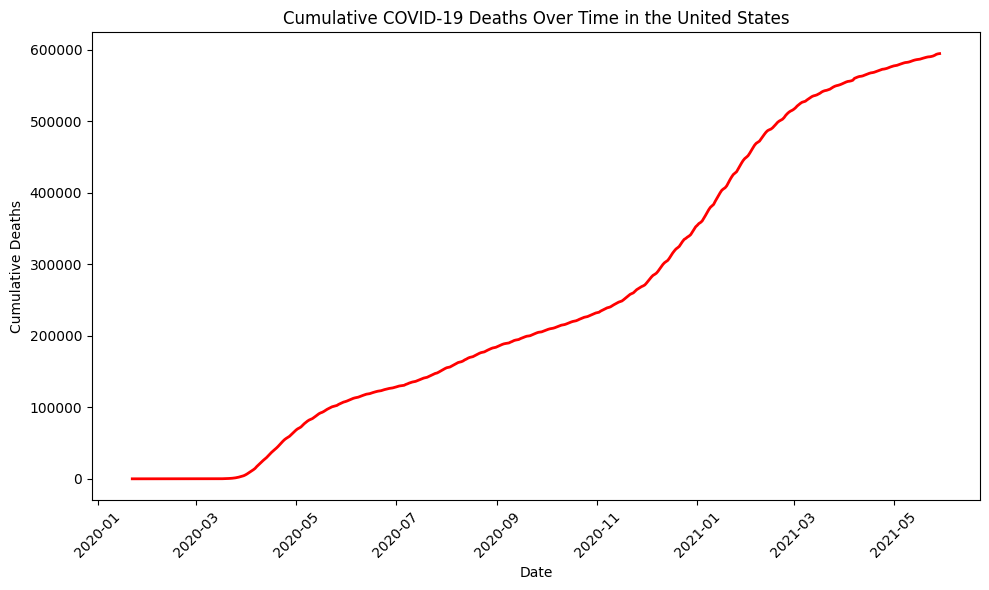

In [67]:
# Plotting how total US deaths have evolved over time:
plt.figure(figsize=(10, 6))
plt.plot(us_cumulative.index, us_cumulative.values, linewidth=2, color="red")
plt.title("Cumulative COVID-19 Deaths Over Time in the United States")
plt.xlabel("Date")
plt.ylabel("Cumulative Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Based on the above plot, we conclude that:
*   The death count due to Covid-19 virus starts increasing around the month of April 2020
*   The death count is consistently increasing at a certain pace in the year 2020
*   There is a sudden spike in the death counts at the beginning of the year 2021. This shows that the virus started spreading faster since people were travelling more and organizing social gatherings for new year celebration
*   The pace of the rising death counts comparatively decreases after the end of the first quarter of 2021





# 7. Data Merging:

## 7.1 How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the "Country/Region" and "Date" columns to create a comprehensive view of the pandemic's impact?

In [68]:
# Defining a function to reads a “wide” DataFrame and returns a "long" DataFrame:

def load_and_melt(df, value_name):
  # Seperating Columns as identifier columns and date columns:
  id_vars = ["Province/State", "Country/Region", "Lat", "Long"]
  date_vars = covid_deaths.columns[4:]

  # Converting those date columns to numeric type:
  df[date_vars] = df[date_vars].apply(pd.to_numeric, errors="coerce")

  # Melting and turning each date-column into two new columns: “Date” and "value_name"
  long_df = df.melt(id_vars = id_vars, value_vars = date_vars, var_name = "Date", value_name = value_name)

  # Converting “Date” from string to datetime:
  long_df["Date"] = pd.to_datetime(long_df["Date"], format="%m/%d/%y")

  return long_df


In [69]:
# Loading and melting each DataFrame:
confirmed_long = load_and_melt(covid_confirmed, value_name="Confirmed")
deaths_long = load_and_melt(covid_deaths, value_name="Deaths")
recovered_long = load_and_melt(covid_recovered, value_name="Recovered")

In [70]:
# Aggregating to country: Doing sum for all "Province/State" rows for each (Country/Region, Date):
agg_conf = confirmed_long.groupby(["Country/Region", "Date"])["Confirmed"].sum().reset_index()

agg_deaths = deaths_long.groupby(["Country/Region", "Date"])["Deaths"].sum().reset_index()

agg_recovered = recovered_long.groupby(["Country/Region", "Date"])["Recovered"].sum().reset_index()

In [71]:
# Merge the three country-level tables on (Country/Region, Date):-
# First, we will merge confirmed + deaths:
cd_merge = pd.merge(agg_conf, agg_deaths, on = ["Country/Region", "Date"], how = "outer")

# Now, we will merge recovered cases as well:
complete_merge = pd.merge(cd_merge, agg_recovered, on = ["Country/Region", "Date"], how = "outer")

In [72]:
# Sorting by country and date:
complete_merge = complete_merge.sort_values(["Country/Region", "Date"]).reset_index(drop=True)
complete_merge

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
95337,Zimbabwe,2021-05-25,38706,1587,36517
95338,Zimbabwe,2021-05-26,38819,1589,36531
95339,Zimbabwe,2021-05-27,38854,1592,36541
95340,Zimbabwe,2021-05-28,38918,1592,36563


#### Note: The data for US in the recovered cases' dataset has non-zero numerical values in the beginning but have zero as values at the end. Since, the data is meant to have cumulative values, we must resolve this anomaly:

In [73]:
# Replacing any 0 in the “Recovered” column with NaN
complete_merge["Recovered"] = complete_merge["Recovered"].replace(0, np.nan)

# Using Forward‐fill within each country group:
complete_merge["Recovered"] = complete_merge.groupby("Country/Region")["Recovered"].transform(lambda x: x.ffill())

# Replacing the NaN values in the first date column by 0:
complete_merge["Recovered"] = complete_merge["Recovered"].fillna(0)

us_recovered = complete_merge[complete_merge["Country/Region"] == "US"][["Date", "Recovered"]]
us_recovered

,Date,Recovered
88426,2020-01-22,0.0
88427,2020-01-23,0.0
88428,2020-01-24,0.0
88429,2020-01-25,0.0
88430,2020-01-26,0.0
...,...,...
88915,2021-05-25,6298082.0
88916,2021-05-26,6298082.0
88917,2021-05-27,6298082.0
88918,2021-05-28,6298082.0


In [74]:
print(complete_merge)

      Country/Region       Date  Confirmed  Deaths  Recovered
0        Afghanistan 2020-01-22          0       0        0.0
1        Afghanistan 2020-01-23          0       0        0.0
2        Afghanistan 2020-01-24          0       0        0.0
3        Afghanistan 2020-01-25          0       0        0.0
4        Afghanistan 2020-01-26          0       0        0.0
...              ...        ...        ...     ...        ...
95337       Zimbabwe 2021-05-25      38706    1587    36517.0
95338       Zimbabwe 2021-05-26      38819    1589    36531.0
95339       Zimbabwe 2021-05-27      38854    1592    36541.0
95340       Zimbabwe 2021-05-28      38918    1592    36563.0
95341       Zimbabwe 2021-05-29      38933    1594    36578.0

[95342 rows x 5 columns]


### Thus, we merged the transformed DataFrames on "Country/Region" and "Date" columns.

### This helps us to get a comprehensive view of the pandemic's impact.

## 7.2 Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of pandemic [From the merged dataset]:

In [75]:
# Creating a “Year‐Month” column from the Date:
complete_merge["YearMonth"] = complete_merge["Date"].dt.to_period("M")
# Grouping by "Country/Region" and "YearMonth" columns:
monthly_summary = complete_merge.groupby(["Country/Region", "YearMonth"])[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

In [76]:
# Converting the “YearMonth” Period back to a Timestamp at the first day of that month:
monthly_summary["MonthStart"] = monthly_summary["YearMonth"].dt.to_timestamp()
# This will be useful while plotting a graph

In [77]:
# Sorting by "Country/Region" and "YearMonth":
monthly_summary = monthly_summary.sort_values(["Country/Region", "YearMonth"]).reset_index(drop=True)
monthly_summary.head(30)

,Country/Region,YearMonth,Confirmed,Deaths,Recovered,MonthStart
0,Afghanistan,2020-01,0,0,0.0,2020-01-01
1,Afghanistan,2020-02,6,0,0.0,2020-02-01
2,Afghanistan,2020-03,1164,27,26.0,2020-03-01
3,Afghanistan,2020-04,27074,890,2927.0,2020-04-01
4,Afghanistan,2020-05,225674,5007,24129.0,2020-05-01
5,Afghanistan,2020-06,750944,15016,184768.0,2020-06-01
6,Afghanistan,2020-07,1077247,33518,688117.0,2020-07-01
7,Afghanistan,2020-08,1163297,42101,843438.0,2020-08-01
8,Afghanistan,2020-09,1163868,42987,949104.0,2020-09-01
9,Afghanistan,2020-10,1245948,46287,1039280.0,2020-10-01


### Analyzing the data to understand the progression of the pandemic:
#### To get a better picture of the progression of the pandemic, we will analyze the data for the top 7 countries having highest number of confirmed cases.
*   We will use the variable `top_7_countries` from the question 2.2
*   It contains a list of the top 7 countries having highest number of confirmed cases


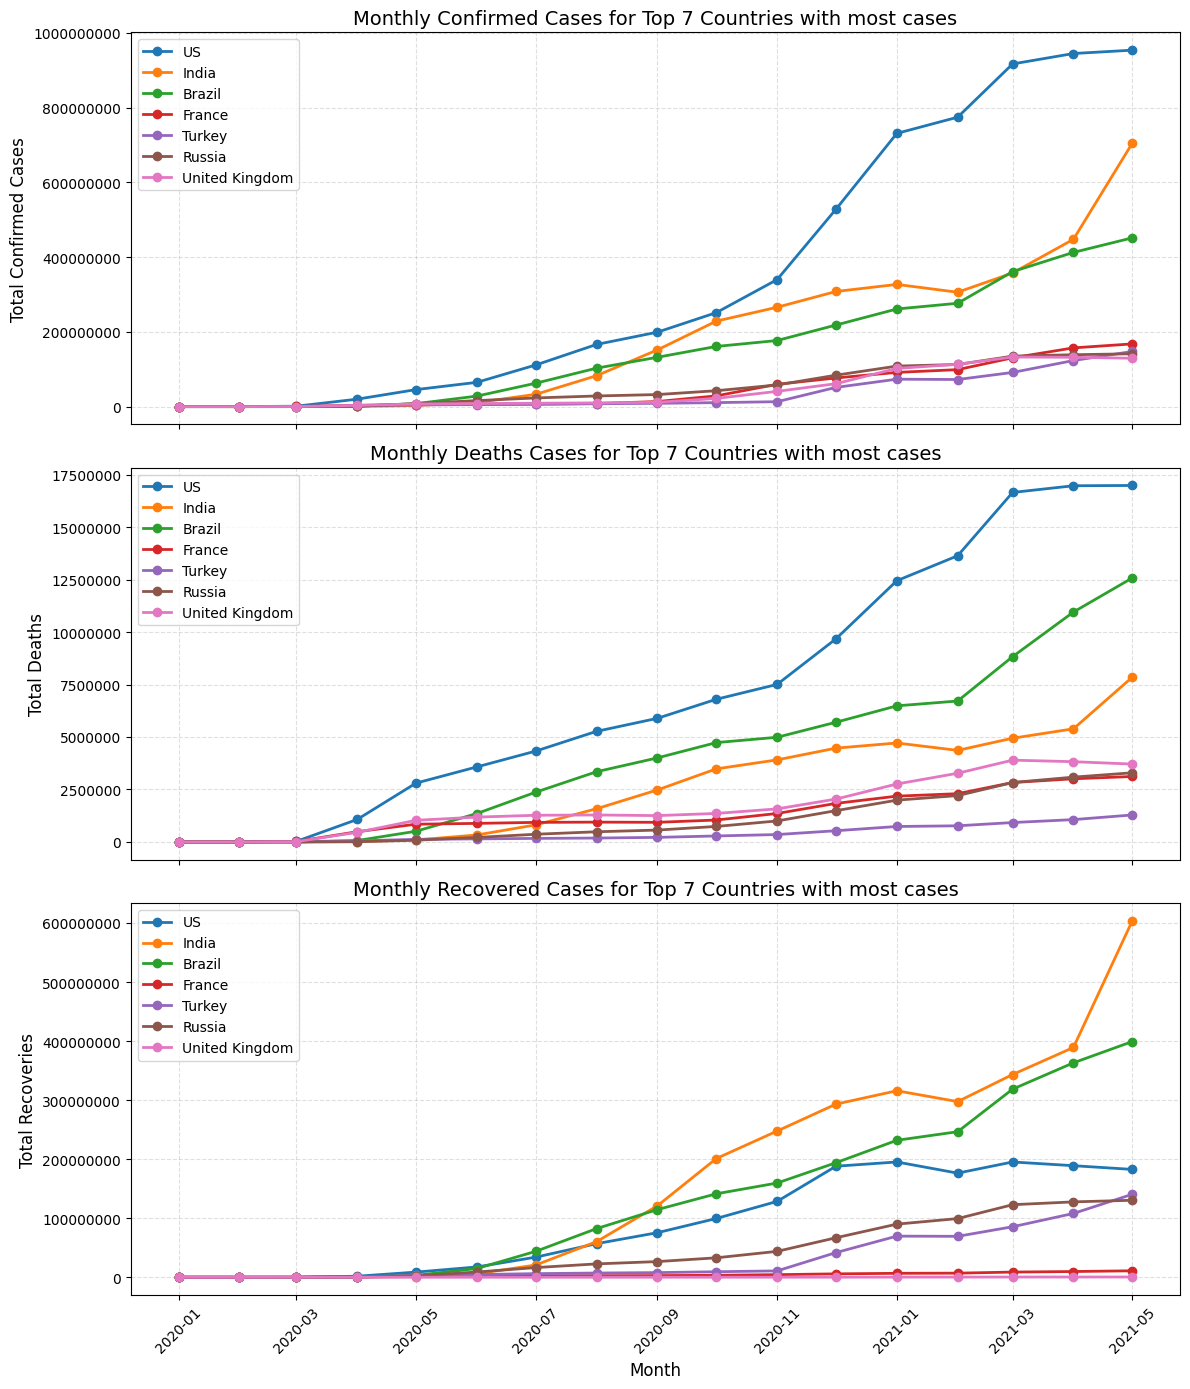

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharex=True)

# Defining a function to plot data for all the specified countries for each metric - Confirmed, Deaths, Recovered:
def plot_metric(ax, metric, ylabel):
  for country in top_7_countries:
    # Filtering only rows for this country
    df_country = monthly_summary[monthly_summary["Country/Region"] == country]
    ax.plot(df_country["MonthStart"], df_country[metric], marker="o", linewidth=2, label=country)
  ax.set_ylabel(ylabel, fontsize=12)
  ax.set_title(f"Monthly {metric} Cases for Top 7 Countries with most cases", fontsize=14)
  ax.legend(loc="upper left")
  ax.grid(True, linestyle="--", alpha=0.4)
  ax.ticklabel_format(style='plain', axis='y', useOffset=False) # To display the values specified for `yticks` as it is instead of in a decimal form


# Plot each metric on its own subplot:
plot_metric(axes[0], "Confirmed", "Total Confirmed Cases")
plot_metric(axes[1], "Deaths", "Total Deaths")
plot_metric(axes[2], "Recovered", "Total Recoveries")

# Formatting the x-axis as dates, and rotating labels
axes[2].set_xlabel("Month", fontsize=12)
for ax in axes:
  ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

### Based on the above graphs, we observe and conclude that:




1.   The number of confirmed cases began to gain momentum from the second quarter of the year 2020. We see a constant increase in the cases after that time period.
2.   Even after the global lockdown the death count kept rising from the beginning of second quarter of the year 2020. Then we see a sudden spike in the death counts around December 2020 and January 2021. This was because people tend to travel more around the time of new year.
3.   The recovery rate of most countries was very less compared to the number of confirmed cases they were having
4.   U.S., India, and Brazil were the countries that had the highest rate of increasing confirmed cases
5.   U.S. and Brazil had a very high number of death counts during the pandemic, whereas India even after being the second highest in the confirmed cases metric, comparatively had a low death count than a developed country like U.S.
6.   India despite being a developing country performed better than all the other countries during the pandemic by having a very high recovery rate
7.  This rapid recovery rate in India can be seen as a result of the rapid vaccination drive implemented throughout the nation





## 7.3 Redo the Analysis done in 7.2 for the countries: [U.S., Italy, and Brazil]

In [79]:
countries = ["US", "Italy", "Brazil"]

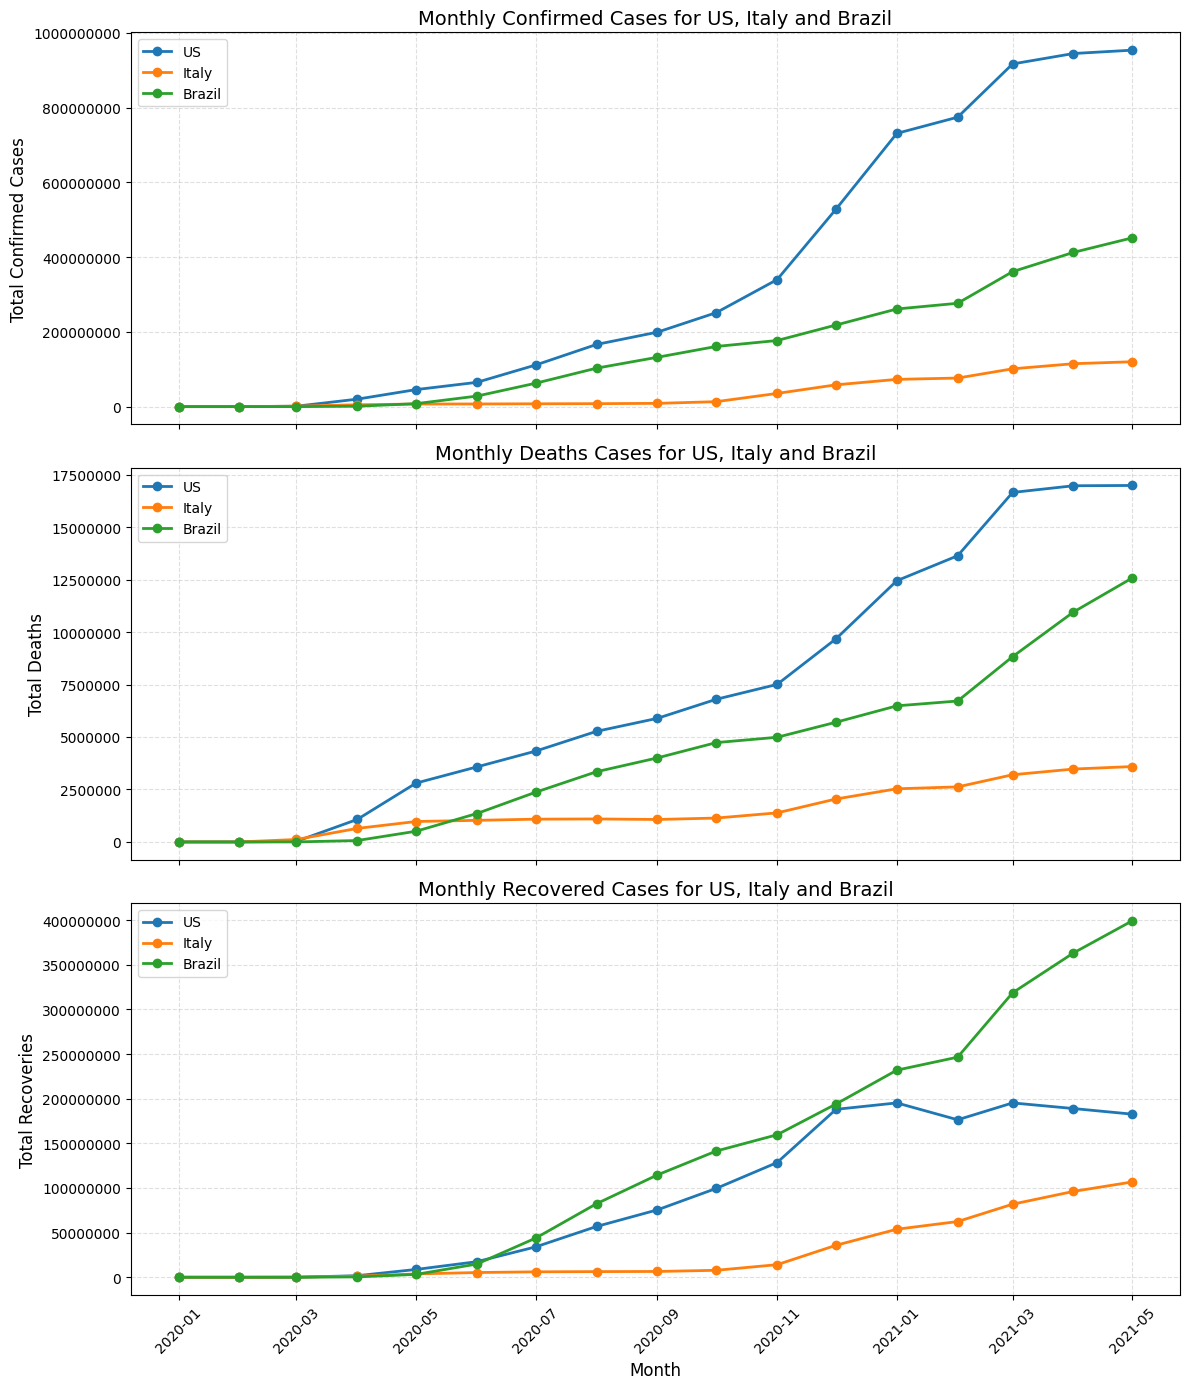

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharex=True)

# Defining a function to plot data for all the specified countries for each metric - Confirmed, Deaths, Recovered:
def plot_metric(ax, metric, ylabel):
  for country in countries:
    # Filtering only rows for this country
    df_country = monthly_summary[monthly_summary["Country/Region"] == country]
    ax.plot(df_country["MonthStart"], df_country[metric], marker="o", linewidth=2, label=country)
  ax.set_ylabel(ylabel, fontsize=12)
  ax.set_title(f"Monthly {metric} Cases for US, Italy and Brazil", fontsize=14)
  ax.legend(loc="upper left")
  ax.grid(True, linestyle="--", alpha=0.4)
  ax.ticklabel_format(style='plain', axis='y', useOffset=False) # To display the values specified for `yticks` as it is instead of in a decimal form


# Plot each metric on its own subplot:
plot_metric(axes[0], "Confirmed", "Total Confirmed Cases")
plot_metric(axes[1], "Deaths", "Total Deaths")
plot_metric(axes[2], "Recovered", "Total Recoveries")

# Formatting the x-axis as dates, and rotating labels
axes[2].set_xlabel("Month", fontsize=12)
for ax in axes:
  ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

### Based on the above graphs, we come on the following conclusion for each country:



1.   US:
*   The US had the most number of confirmed cases out of the three countries
*   Despite being a developed country the death count was highest in US
*   And the recovery rate was also comparatively very low

2.   Italy:
*   Italy comparatively had the least number of confirmed cases.
*   The death count was also the least out of all the three countries
*   And the recovery rate was also at an average level

3.   Brazil:
*   Brazil had more number of confirmed cases than Italy and less number of confirmed cases than US
*   The death count was quite high compared to Italy but lower than that of the US
*   Despite being a developing nation, Brazil had an excellent recovery rate


#### This shows that US despite being a developed nation, struggled with pandemic management. Whereas, Italy being a developing country, performed better during the pandemic.

#### Thus, we conclude that planning and proper execution is everything

# 8. Combined Data Analysis:

## 8.1 For the combined dataset, identify the three countries with the highest average death rates (deaths / confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [81]:
# Ensuring Date is of datetime dtype:
complete_merge["Date"] = pd.to_datetime(complete_merge["Date"])

# Reordering for a better structure:
complete_merge = complete_merge[["Country/Region", "Date", "YearMonth", "Confirmed", "Deaths", "Recovered"]]


# Filtering for all dates in calendar year 2020:
mask_2020 = (complete_merge["Date"] >= "2020-01-01") & (complete_merge["Date"] <= "2020-12-31")
df_2020 = complete_merge.loc[mask_2020].copy()


# Computing a daily cumulative death‐rate column as Deaths / Confirmed:
# Dropping any row where death count is more than the confirmed cases:
mask = (df_2020["Confirmed"] == 0) & (df_2020["Deaths"] > 0)
df_2020 = df_2020[~mask].reset_index(drop=True)
df_2020["DeathRate"] = df_2020["Deaths"] / df_2020["Confirmed"]
df_2020["DeathRate"] = df_2020["DeathRate"].fillna(0)

In [82]:
# Grouping by country and calculating the mean death‐rate over all 2020 dates:
country_avg_dr = df_2020.groupby("Country/Region")["DeathRate"].mean().reset_index().rename(columns={"DeathRate": "AvgDeathRate_2020"})

# Dropping any countries whose mean is NaN:
country_avg_dr = country_avg_dr.dropna(subset=["AvgDeathRate_2020"])

In [83]:
# Sorting in descending order and taking the top 3 rows:
top3_avg_dr = country_avg_dr.sort_values("AvgDeathRate_2020", ascending=False).head(3).reset_index(drop=True)

# Formatting the rate as a percentage
top3_avg_dr["AvgDeathRate_2020"] = (top3_avg_dr["AvgDeathRate_2020"] * 100).round(2)
top3_avg_dr

#--------------------------------------------------------------------------------------------------------------------------------------------------------------
# Note: Since MS Zaandam is not an official country, and we are asked to find the top 3 countries, we will skip "MS Zaandam" and consider one additional value:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------

# Sorting in descending order and taking the top 4 rows:
top4_avg_dr = country_avg_dr.sort_values("AvgDeathRate_2020", ascending=False).head(4).reset_index(drop=True)


# Dropping the row for "MS Zaandam":
top3_avg_dr_countries = top4_avg_dr[top4_avg_dr["Country/Region"] != "MS Zaandam"].reset_index(drop=True)

# Formatting the rate as a percentage
top3_avg_dr_countries["AvgDeathRate_2020"] = (top3_avg_dr_countries["AvgDeathRate_2020"] * 100).round(2)
top3_avg_dr_countries

,Country/Region,AvgDeathRate_2020
0,Yemen,19.24
1,Italy,9.46
2,Sudan,8.83


##### Note that we skipped MS Zaandam becaue:
  * “MS Zaandam” is not a sovereign nation at all but the name of a cruise ship.
  * Here, certain passenger ships (e.g. the Diamond Princess, MS Zaandam) are treated like “Country/Region” entries because they reported their own aggregated case counts.
  * Specifically, MS Zaandam was a Holland America Line cruise ship that experienced a COVID-19 outbreak early in 2020, and its cases are tracked separately from any land-based country.

### Now based on the final results including only countries, we come on the following conclusion:

 1. Yemen:
  * Yemen is considered to be one of the least developed countries.
  * Therefore, due to lack of medical care resources, Yemen had the highest death rate.
  
 2. Italy:
  * Italy is one of the highly developed nations.
  * Yet, Italy had a very high death rate even after having the economic resources.
  * This shows us that inspite having all the resources, it all comes down to planning and execution.
 3. Sudan:
  * Sudan is also considered to be one of the least developed countries.
  * Thus, similar to Yemen, it had to go through a hard time during the pandemic.
  * This tells us that the under developed or developing countries like Yemen and Sudan were the one who suffered the most during this pandemic.

#### Some of the major reasons for high death rate can be:
 * Overwhelmed healthcare systems (lack of ICU beds, ventilators, etc.).

 * Older population demographics (Covid-19 tends to kill more in older age groups).

 * Delayed case identification or treatment.
 * Under reporting of mild cases.

## 8.2 Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of Covid-19 cases in the country?

In [84]:
# Accessing data for South Africa:
south_africa = complete_merge[complete_merge["Country/Region"] == "South Africa"].copy()
south_africa

,Country/Region,Date,YearMonth,Confirmed,Deaths,Recovered
79534,South Africa,2020-01-22,2020-01,0,0,0.0
79535,South Africa,2020-01-23,2020-01,0,0,0.0
79536,South Africa,2020-01-24,2020-01,0,0,0.0
79537,South Africa,2020-01-25,2020-01,0,0,0.0
79538,South Africa,2020-01-26,2020-01,0,0,0.0
...,...,...,...,...,...,...
80023,South Africa,2021-05-25,2021-05,1637848,55976,1543951.0
80024,South Africa,2021-05-26,2021-05,1645555,56077,1546583.0
80025,South Africa,2021-05-27,2021-05,1649977,56170,1548092.0
80026,South Africa,2021-05-28,2021-05,1654551,56293,1551520.0


In [85]:
# Accessing the most recent totals for Deaths and Recovered:
latest_row = south_africa.iloc[-1]
total_deaths = latest_row["Deaths"]
total_recoveries = latest_row["Recovered"]

In [94]:
# Printing the obtained data:
print(f"South Africa — as of {latest_row['Date'].date()}:")
print(f"|-> Total Deaths: {int(total_deaths)}")
print(f"|-> Total Recoveries: {int(total_recoveries)}")
print(f"|-> Recovery / Death ratio: {total_recoveries / total_deaths:.2f}")

# For every 1 person dying 27.57 ≈ 28 people recovered

South Africa — as of 2021-05-29:
|-> Total Deaths: 56363
|-> Total Recoveries: 1554184
|-> Recovery / Death ratio: 27.57


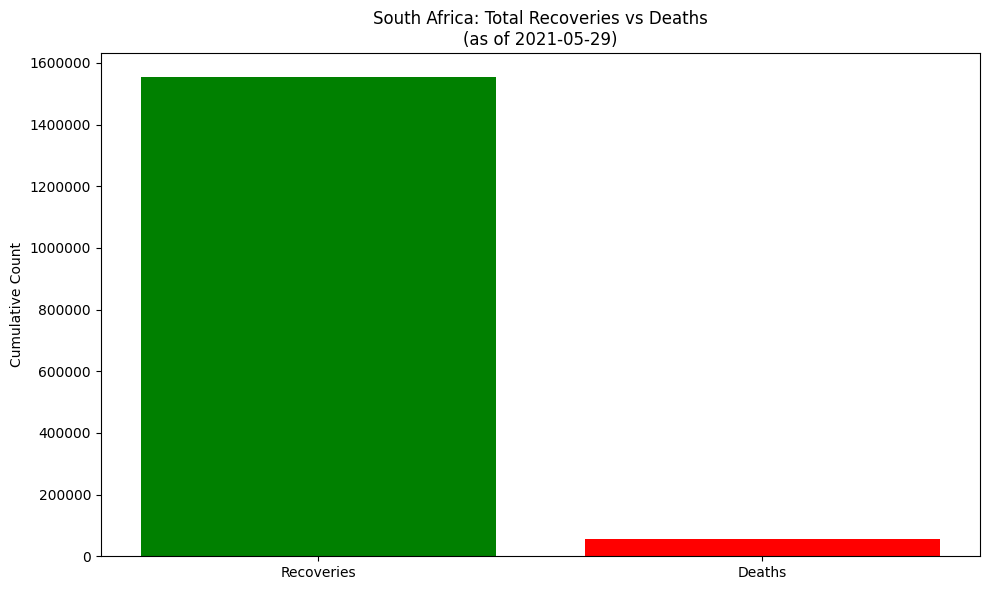

In [98]:
# Plotting a simple bar chart to compare "Total Recoveries" vs "Total Deaths" as of the latest date:
plt.figure(figsize=(10, 6))
plt.bar(["Recoveries", "Deaths"], [total_recoveries, total_deaths], color=["green", "red"])
plt.title(f"South Africa: Total Recoveries vs Deaths\n(as of {latest_row['Date'].date()})")
plt.ylabel("Cumulative Count")
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False) # To display the values on y-axis as it is instead of in a decimal form
plt.tight_layout()
plt.show()

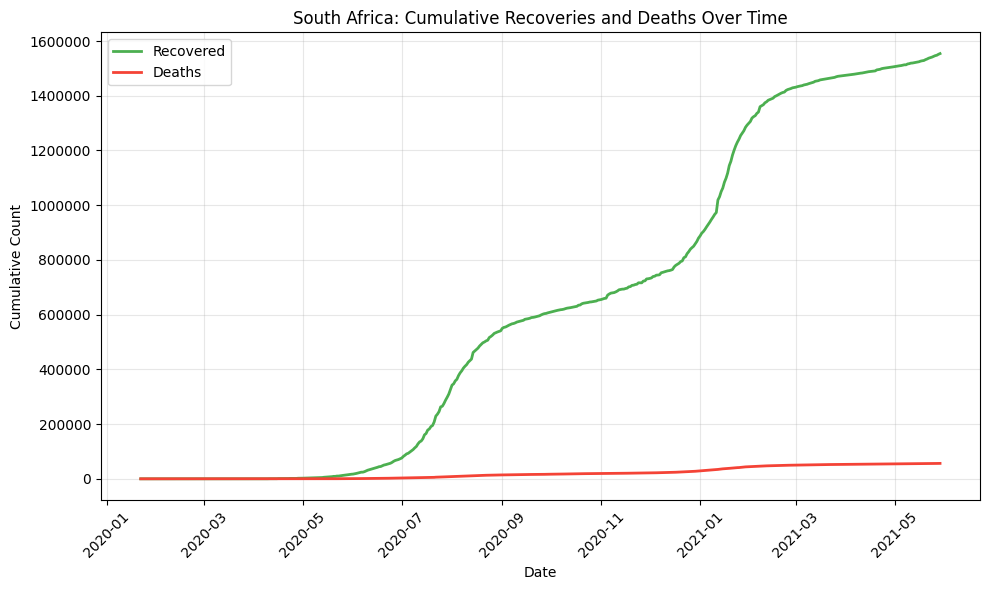

In [100]:
# Plotting the time series of cumulative Recoveries and Deaths over 2020–2021:
plt.figure(figsize=(10, 6))
plt.plot(south_africa["Date"], south_africa["Recovered"], label="Recovered", color="#4CAF50", linewidth=2)
plt.plot(south_africa["Date"], south_africa["Deaths"], label="Deaths", color="#F44336", linewidth=2)
plt.title("South Africa: Cumulative Recoveries and Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False) # To display the values on y-axis as it is instead of in a decimal form
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Based on the above data we calculated and the graphs we plotted, we can come to the follwing conclusion about the outcomes of Covid-19 cases in the South Africa:

 1. High overall survival rate:
  * Because cumulative recoveries remain well above cumulative deaths, the data shows that most confirmed cases survived.
  * Even during waves when hospital capacity was stretched, a large majority of patients eventually recovered.
 2. Improvements over time:
  * Early in the pandemic, the gap between recoveries and deaths was smaller — meaning that a higher proportion of known cases ended in fatality.
  * As the country’s health system adapted (treatments improved, protocols standardized, more beds/oxygen available), later waves show a steeper rise in recoveries relative to deaths.
  * In other words, the curves drift further apart over time, pointing to better outcomes in later months.
 3. A recovery to death ratio of 27.57:
  * Stats that for every 1 person dying, 27.57 ≈ 28 people recovered.
  * Shows us that even though the nation struggles at the beginning of the pandemic, it showed improvement over time, managing resources effectively and efficiently.



## 8.3 Analyze the ratio of recoveries to confirmed cases for the united states monthly from march 2020 to may 2021. Which month experienced the highest recovery ratio, and what could be the potential reason?

In [110]:
# Ensuring that the “Date” is datetime dtype:
complete_merge["Date"] = pd.to_datetime(complete_merge["Date"])


# Filtering for US and the required date range (march 2020 – may 2021)
us_df = complete_merge[(complete_merge["Country/Region"] == "US") & (complete_merge["Date"] >= "2020-03-01") & (complete_merge["Date"] <= "2021-05-31")].copy()

# Grouping by YearMonth and adding number of confirmed and recovered cases for each month:
monthly_us = us_df.groupby("YearMonth")[["Confirmed", "Recovered"]].sum().reset_index()

# Computing the ratio of monthly recoveries to monthly confirmed cases:
monthly_us["RecoveryRatio"] = monthly_us["Recovered"] / monthly_us["Confirmed"]

# Converting to percentage:
monthly_us["RecoveryRatioPercentage"] = (monthly_us["RecoveryRatio"] * 100).round(2)

# Accessing the month with the highest recovery ratio:
max_recovery = monthly_us.loc[monthly_us["RecoveryRatio"].idxmax()]

,7
YearMonth,2020-10
Confirmed,251406215
Recovered,99506279.0
RecoveryRatio,0.395799
RecoveryRatioPercentage,39.58


In [115]:
# Printing the monthly table and the maximum recovery ratio:
print("Monthly US Recovery vs. Confirmed (Mar 2020 – May 2021):\n")
print(monthly_us.to_string(index=False))
print()
print("Month with highest recovery ratio:")
print(f"YearMonth: {max_recovery['YearMonth']}")
print(f"Confirmed cases: {int(max_recovery['Confirmed']):,}")
print(f"Recoveries: {int(max_recovery['Recovered']):,}")
print(f"Recovery ratio: {max_recovery['RecoveryRatioPercentage']}%")

Monthly US Recovery vs. Confirmed (Mar 2020 – May 2021):

YearMonth  Confirmed   Recovered  RecoveryRatio  RecoveryRatioPercentage
  2020-03    1120122     19730.0       0.017614                     1.76
  2020-04   19959287   1747977.0       0.087577                     8.76
  2020-05   45533906   8720047.0       0.191507                    19.15
  2020-06   64964762  17434297.0       0.268365                    26.84
  2020-07  111371152  34028380.0       0.305540                    30.55
  2020-08  166357378  56877502.0       0.341899                    34.19
  2020-09  199220181  75486815.0       0.378911                    37.89
  2020-10  251406215  99506279.0       0.395799                    39.58
  2020-11  339796331 128470711.0       0.378082                    37.81
  2020-12  528139775 188045478.0       0.356052                    35.61
  2021-01  730894746 195240542.0       0.267125                    26.71
  2021-02  774254261 176346296.0       0.227763                   

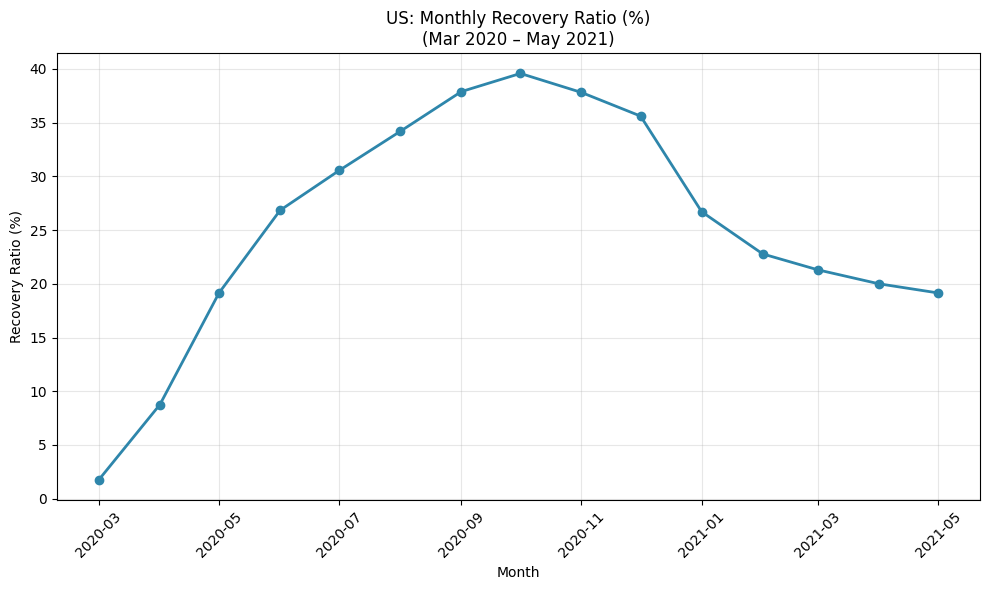

In [120]:
# The YearMonth column contains a Period, we need to convert it to a datetime (month start) for plotting:
monthly_us["MonthStart"] = monthly_us["YearMonth"].dt.to_timestamp()

# Plotting the obtained data for recovery ratio percentage:
plt.figure(figsize=(10, 6))
plt.plot(monthly_us["MonthStart"], monthly_us["RecoveryRatioPercentage"], marker="o", linewidth=2, color="#2E86AB")
plt.title("US: Monthly Recovery Ratio (%)\n(Mar 2020 – May 2021)")
plt.xlabel("Month")
plt.ylabel("Recovery Ratio (%)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Based on the data we extracted and the graph we plotted, we can come on the following conclusion as the potential reasons for October 2020 experiencing the highest recovery rate:

 1. In October 2020, fewer new COVID cases were being reported compared to the summer and winter spikes.

 2. Many people who fell sick during the big summer wave (July to August) had already recovered by October, so their recoveries showed up in that month’s numbers.

 3. Because October saw a lot of those delayed “recovery” reports but not a matching jump in new confirmed cases, the ratio of recoveries to confirmed cases looked especially high.

 4. Health officials had also improved how they counted someone as “recovered,” so there were fewer delayed reports and more people officially marked as recovered in October.

#### To comclude, by October, most people who got sick earlier had gotten better, and fewer people were getting newly infected, that's why the month of October 2020 experienced the highest recovery rate.

# 9. End of the Case Study:
 * #### The COVID-19 pandemic tested healthcare systems and data-reporting processes around the world.
 * #### By comparing confirmed, death, and recovery trends — we see how timely reporting and robust infrastructure can improve patient outcomes.
 * #### Moving forward, we must continue refining our healthcare ecosystem, expanding vaccine access, and preparing for future health crises.
 * #### Covid-19 brought unprecedented challenges — from entire nations to individual households — yet we emerged stronger together.
 * #### It taught us to be grateful for what we have and to live every moment to the fullest. Above all, it reminded us to stay prepared for the future.

## Thank you for reviewing these findings. I hope they illustrate how data can guide better pandemic responses and remind us to stay prepared for whatever comes next.